The first 10 values of raw audio data :
[ 0.0000000e+00  0.0000000e+00  9.1552734e-05  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -9.1552734e-05
 -9.1552734e-05  0.0000000e+00]
The Dimensions of the Audio : 
(176400,)
Sample Rate : 44100
Dimensions of spectrogram:
(128, 345)
<class 'numpy.ndarray'>


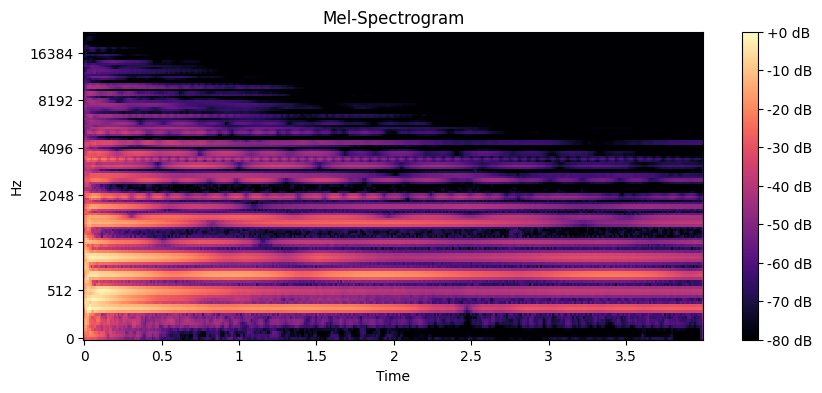

In [2]:
import numpy as np
import matplotlib.pylab as plt
import librosa

audio_file_path = './data/major/C_Major_v10_0.wav'

raw_data, sample_rate = librosa.load(audio_file_path, sr=None)  # sr=None keeps the original sample rate

print("The first 10 values of raw audio data :")
print(raw_data[:10])

print("The Dimensions of the Audio : ")
print(raw_data.shape)

print("Sample Rate : " + str(sample_rate))

# convert the data into spectrogram and then convert to decibels dB
spectrogram = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=128, fmax=8000)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

print("Dimensions of spectrogram:")
print(spectrogram_db.shape)
print(type(spectrogram_db))

# Plot the spectrogram using librosa's display module
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sample_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.show()



In [3]:
# PREPARING TRAINING DATA

from DataPreparation import prepare_dataset

train_data, train_labels, val_data, val_labels, test_data, test_labels = prepare_dataset('./data')

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.fit_transform(val_labels)
test_labels = label_encoder.fit_transform(test_labels)


In [ ]:
print("Dimensions of Training Data:")
print(train_data[0].shape)
print(train_data[0])

Dimensions of Training Data:
(173,)
[0.47098827 0.56707615 0.6024293  0.6001674  0.6011758  0.5803307
 0.5439341  0.50089395 0.47849283 0.5100454  0.5399759  0.5671747
 0.5477344  0.4695014  0.48638305 0.5014807  0.49647093 0.48469067
 0.4590558  0.45505062 0.37131396 0.41362745 0.47143716 0.45360336
 0.3416806  0.31689358 0.34735513 0.38775665 0.37433988 0.36353588
 0.24767737 0.33855325 0.30498132 0.20023155 0.2774726  0.27166852
 0.13089275 0.22430038 0.20331392 0.24250174 0.26481637 0.25415295
 0.26167363 0.27902174 0.32627535 0.2596405  0.2745889  0.28122282
 0.24826483 0.30459976 0.28600115 0.29947343 0.17434339 0.15834112
 0.17323522 0.21340999 0.15802631 0.1654621  0.14341421 0.14072514
 0.19021168 0.15947476 0.20199475 0.18994121 0.14349356 0.12417336
 0.11589117 0.18899937 0.18580084 0.10491648 0.10789995 0.01627846
 0.00185242 0.         0.         0.06715374 0.08021422 0.0585371
 0.07475414 0.12890759 0.14104214 0.10291938 0.         0.
 0.         0.16684571 0.20412378 0.1

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from Model import create_cnn_model 

model = create_cnn_model(train_data)
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, epochs=20, batch_size=32, verbose=1, validation_data=(val_data, val_labels))

Epoch 1/20


c:\Users\Chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.4867 - loss: 0.7175 - val_accuracy: 0.5011 - val_loss: 0.6931
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.5187 - loss: 0.6932 - val_accuracy: 0.5185 - val_loss: 0.6930
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.5060 - loss: 0.6927 - val_accuracy: 0.5359 - val_loss: 0.6913
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.5530 - loss: 0.6845 - val_accuracy: 0.6078 - val_loss: 0.6615
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.6714 - loss: 0.5660 - val_accuracy: 0.7908 - val_loss: 0.4036
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.8230 - loss: 0.3222 - val_accuracy: 0.8388 - val_loss: 0.2916
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.8939 - loss: 0.2151 - val_accuracy: 0.9107 - val_loss: 0.1991
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.9546 - loss: 0.1172 - val_accurac

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 171, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 83, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 41, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 39, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 34048)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,358,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,353,221 (50.94 MB)

 Trainable params: 4,451,073 (16.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,902,148 (33.96 MB)

15/15 - 0s - 23ms/step - accuracy: 0.9913 - loss: 0.0130


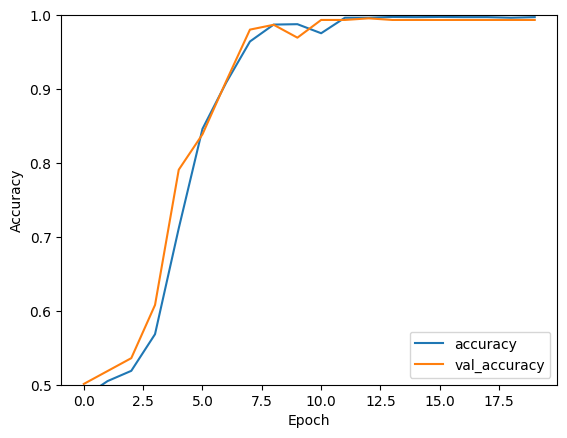

In [6]:
model.summary()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)

In [9]:
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true = np.array(test_labels)  
conf_matrix = tf.math.confusion_matrix(y_true, y_pred_classes)
print(conf_matrix.numpy())


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[229   0]
 [230   0]]
